In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('Mall_Customers.csv')
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [35]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [37]:
# Changing last two column names for easier analysis
df.rename(index=str, columns={'Annual Income (k$)': 'AnnualIncome',
                              'Spending Score (1-100)': 'Score',
                              'Genre': 'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
import seaborn as sns

* Lets visualize the distrubution of our features by gender using sns.
* for that we will have to drop CustomerID as it is not relevant to our distrubtion at this this.

In [39]:
df_noID = df.drop(['CustomerID'], axis = 1)
#df_noGender = df.drop(['Gender'], axis = 1)

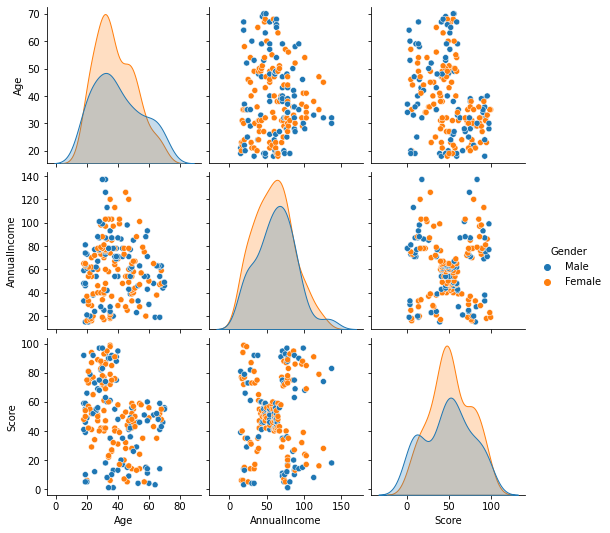

In [40]:
sns.pairplot(data=df_noID, hue='Gender')

* Lets make a correlation heatmap for the features

In [41]:
mask = np.triu(np.ones_like(df_noID.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

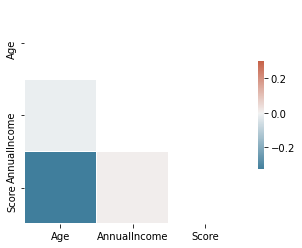

In [42]:
sns.heatmap(df_noID.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

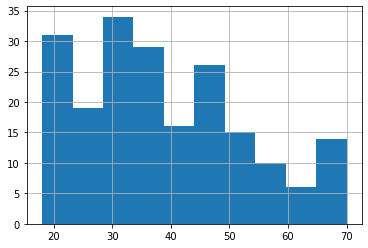

In [53]:
df.Age.hist()

<AxesSubplot:>

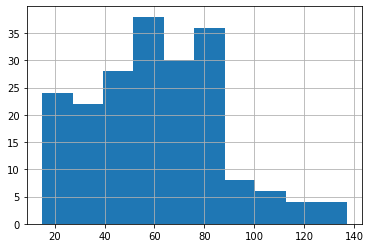

In [57]:
df.AnnualIncome.hist()

<AxesSubplot:>

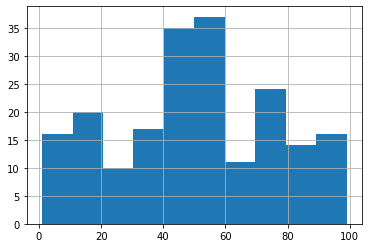

In [59]:
df.Score.hist()

* Histograms for the all features

graph for Gender: total = 2


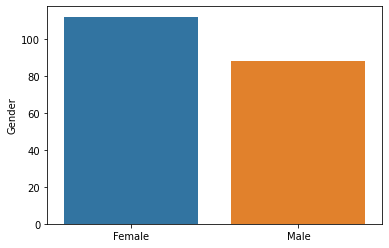

graph for Age: total = 20


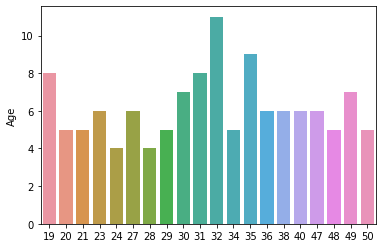

graph for AnnualIncome: total = 20


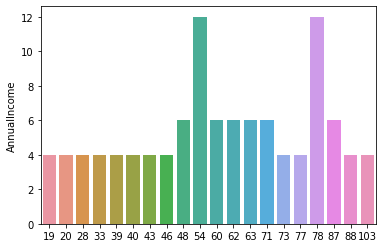

graph for Score: total = 20


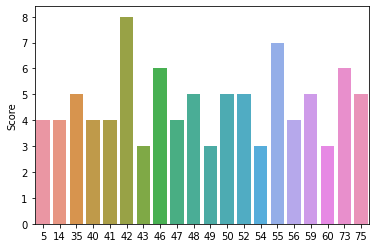

In [56]:
for i in df_noID.columns:
    col_num = df_noID[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(col_num)))
    chart = sns.barplot(x=col_num.index, y=col_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

In [44]:
pd.set_option('display.max_rows', None)

In [45]:
pd.pivot_table(df_noID, index = ['Gender', 'Age'], values = 'AnnualIncome', aggfunc = 'count').sort_values('Gender', ascending = False)

AnnualIncome
Gender Age              
Male   18              3
       31              1
       39              3
       38              2
       37              2
       36              2
       35              3
       34              2
       33              2
       32              5
       30              2
       42              1
       29              1
       28              3
       27              2
       26              2
       25              2
       24              2
       22              1
       21              1
       40              3
       43              2
       19              6
       59              4
       69              1
       68              1
       67              3
       66              1
       65              1
       64              1
       63              1
       60              1
       58              1
       46              1
       57              1
       54              1
       53              2
       52              1
       50              1
       49              1
       48              5
       47              2
       20              3
       70              2
Female 19              2
       30              5
       38              4
       37              1
       36              4
       35              6
       34              3
       33              1
       32              6
       31              7
       29              4
       41              2
       28              1
       27              4
       25              1
       24              2
       23              6
       22              2
       21              4
       20              2
       40              3
       42              1
       68              2
       55              1
       67              1
       66              1
       65              1
       63              1
       60              2
       58              1
       57              1
       56              1
       54              3
       43              1
       52              1
       51              2
       50              4
       49              6
       47              4
       46              2
       45              3
       44              2
       18              1

In [46]:
df_pivots = df_noID

In [51]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'Score').sort_values('Score', ascending = False))

Gender
            Score
Gender           
Female  51.526786
Male    48.511364
Age
         Score
Age           
39   84.666667
30   80.285714
29   76.600000
24   71.500000
22   70.000000
28   70.000000
21   66.800000
32   66.000000
35   63.888889
31   63.875000
23   63.333333
38   63.166667
27   60.333333
18   60.000000
55   58.000000
70   55.500000
26   54.500000
33   54.333333
36   52.500000
66   49.000000
68   48.666667
40   47.500000
63   47.000000
51   46.500000
69   46.000000
50   45.800000
65   43.500000
49   42.714286
48   41.800000
67   41.500000
20   40.200000
19   39.750000
25   39.666667
34   39.200000
45   37.666667
60   36.333333
54   35.750000
56   35.000000
43   34.000000
59   33.000000
47   28.500000
57   28.000000
41   28.000000
53   25.000000
46   21.333333
52   21.000000
42   18.500000
37   15.333333
58   15.000000
44   13.500000
64    3.000000
AnnualIncome
                  Score
AnnualIncome           
69            74.500000
99            68.000000
23           

ValueError: Grouper for 'Score' not 1-dimensional